#### Problem Statement : Classify the incoming data for Kyphosis occurence.

**CART - Classification and Regression Trees**

http://www.stat.umn.edu/RegGraph/data/Kyphosis.lsp

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Import Dataset

- Col 0 = Age = months
- Col 1 = Start = starting vertebrae
- Col 2 = Num = number of vertebrae
- Col 3 = Kyphosis = 1 if present, 0 if absent

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


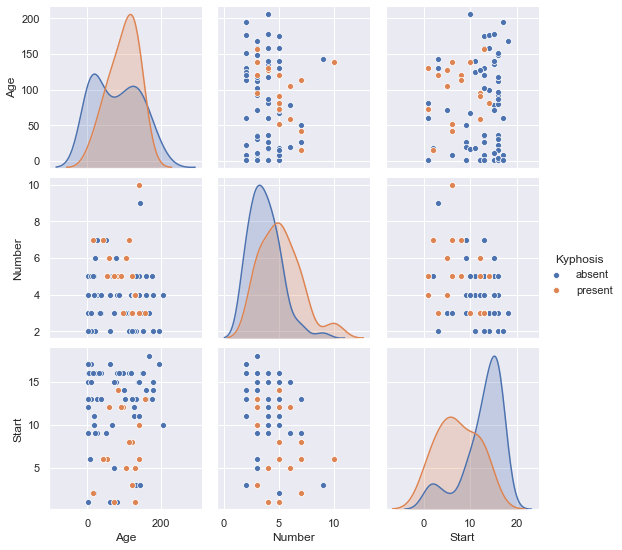

In [4]:
sns.pairplot(df,hue='Kyphosis');

#### Train Test Split

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [6]:
X_train.shape

(72, 3)

In [7]:
X_test.shape

(9, 3)

#### Train using a decision tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Prediction

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred_train = dtree.predict(X_train)

print(f'Accuracy Score :\n{accuracy_score(y_train,y_pred_train)}')
print(f'\n\nConfusion Matrix :\n{confusion_matrix(y_train,y_pred_train)}')
print(f'\n\nClassification Report :\n{classification_report(y_train,y_pred_train)}')

Accuracy Score :
1.0


Confusion Matrix :
[[57  0]
 [ 0 15]]


Classification Report :
              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        57
     present       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [10]:
y_pred_test = dtree.predict(X_test)

print(f'Accuracy Score :\n{accuracy_score(y_test,y_pred_test)}')
print(f'\n\nConfusion Matrix :\n{confusion_matrix(y_test,y_pred_test)}')
print(f'\n\nClassification Report :\n{classification_report(y_test,y_pred_test)}')

Accuracy Score :
0.7777777777777778


Confusion Matrix :
[[6 1]
 [1 1]]


Classification Report :
              precision    recall  f1-score   support

      absent       0.86      0.86      0.86         7
     present       0.50      0.50      0.50         2

    accuracy                           0.78         9
   macro avg       0.68      0.68      0.68         9
weighted avg       0.78      0.78      0.78         9



#### Visualize the decision tree

In [11]:
X_train.shape

(72, 3)

In [12]:
import sklearn
print(sklearn.__version__)

0.23.2


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_export.py:183: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


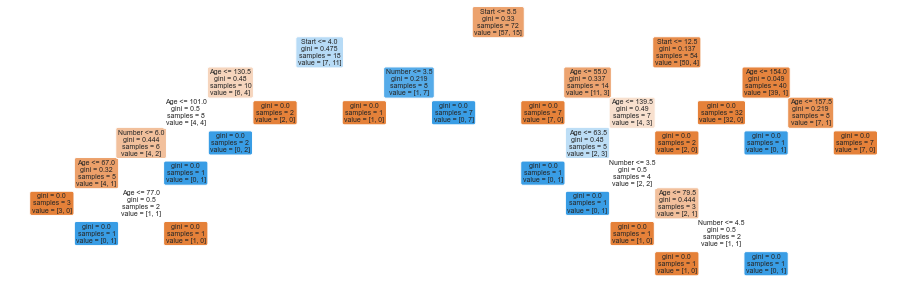

In [13]:
from sklearn.tree import plot_tree

features = list(df.columns[1:])

plt.figure(figsize=(16,5))

s = plot_tree(dtree,
              filled=True,
              rounded=True,
              feature_names=features,
              rotate=True)

1. Attribute Selection Measures
2. Hyperparameter tuning
3. Ensembling of decision trees
    * Random Forest
    * Adaboost
    * XGBoost
    
4. Handling of imbalanced datasets (brief)
    * Smote
    * and other techniques

* Generally, decision tree is used in conjunction with other decision trees as part of an ensemble like Random forest, or Boosting / bagging algos.

# Great Job !